## **Muhammad Grandiv Lava Putra - Teknologi Informasi 22 - 22/493242/TK/54023**

## **Tujuan analisis:**
Menganalisis karakteristik siswa yang lulus (average score di atas 70, sesuai dengan batas kelulusan di negara maju) berdasarkan performa dan latar belakang demografik siswa.

## **Pertanyaan**
1. Berapa persen siswa yang berhasil lulus?
2. Berapa persen siswa yang lulus dengan rata-rata nilai di atas 90?
3. Bagaimana efek dari parental level of education terhadap kelulusan?
4. Apakah ras memengaruhi kelulusan?
5. Apa korelasi siswa yang mendapat makan siang gratis/murah dan yang secara standard harus membayar makan siang terhadap  kelulusan?
6. Berapa besar *impact* dari test preparation course terhadap kelulusan?
7. Berapa perbandingan antara siswa laki-laki yang lulus dengan siswa perempuan yang lulus?
8. Bagaimana karakteristik siswa yang lulus? (nilai di atas 70)

## **Deskripsi Features**

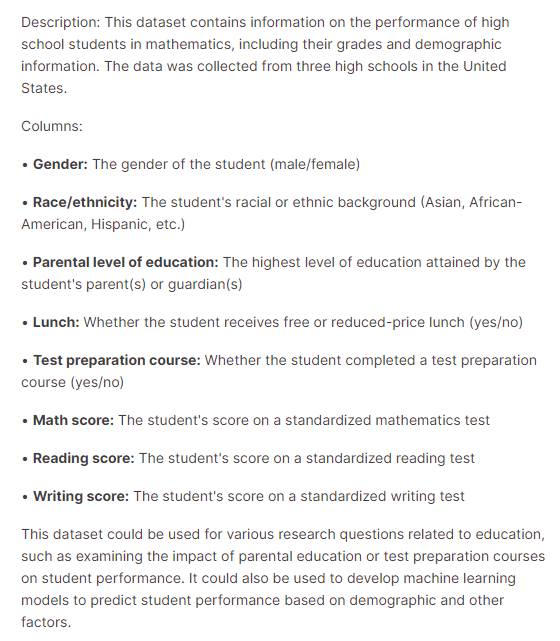

In [ ]:
# Mengimport packages yang diperlukan
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## **Menampilkan Informasi Data**

In [ ]:
df = pd.read_csv('exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [ ]:
# Ukuran dataset
df.shape

(1000, 8)

In [ ]:
# Menampilkan nama-nama kolom pada dataset
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
# Menampilkan jenis tipe data setiap kolom
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [ ]:
# Cek duplikasi
df[df.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [ ]:
# Cek null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## **Feature Engineering**

1. Membuat kolom rata-rata nilai dan status kelulusan siswa

In [ ]:
# Menambahkan kolom rata-rata dan kelulusan siswa
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['passed'] = np.where(df['average score'] > 70, 1, 0)

2. Mengubah isi kolom passed menjadi `Tidak Lulus` dan `Lulus`

In [ ]:
df['passed'] = df['passed'].replace({0:'Tidak Lulus', 1:'Lulus'})

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,passed
0,female,group D,some college,standard,completed,59,70,78,69.000000,Tidak Lulus
1,male,group D,associate's degree,standard,none,96,93,87,92.000000,Lulus
2,female,group D,some college,free/reduced,none,57,76,77,70.000000,Tidak Lulus
3,male,group B,some college,free/reduced,none,70,70,63,67.666667,Tidak Lulus
4,female,group D,associate's degree,standard,none,83,85,86,84.666667,Lulus


## **Exploratory Data Analysis (EDA)**

**1. Berapa persen siswa yang berhasil lulus?**

In [ ]:
passed_counts = df['passed'].value_counts()
passed_counts

Tidak Lulus    508
Lulus          492
Name: passed, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

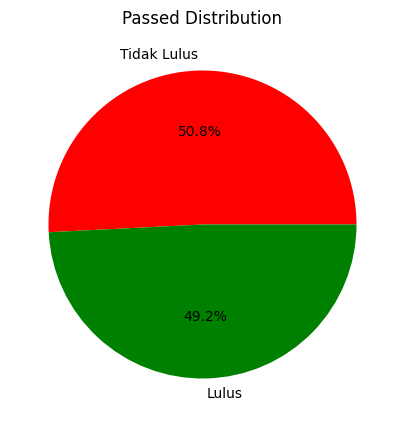

In [ ]:
passed_counts = df['passed'].value_counts()

colors = ['red', 'green']

plt.figure(figsize = (5, 5))

plt.pie(passed_counts, labels=passed_counts.index, autopct='%1.1f%%', colors=colors)

plt.title('Passed Distribution')

plt.show()

**Kesimpulan**: Dari 1000 siswa, terdapat 49.2% siswa yang lulus dan 50.8% siswa tidak lulus

**2. Berapa persen siswa yang lulus dengan rata-rata nilai di atas 90?**

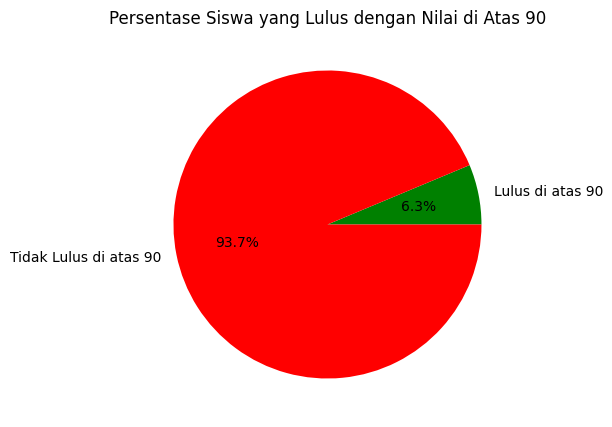

In [ ]:
# Menghitung jumlah siswa dengan nilai rata-rata di atas 90
above_90_counts = (df['average score'] > 90).sum()

# Menghitung jumlah total siswa
total_counts = df.shape[0]

percentage_above_90 = (above_90_counts / total_counts) * 100

# Menyiapkan data untuk pie chart
labels = ['Lulus di atas 90', 'Tidak Lulus di atas 90']
sizes = [percentage_above_90, 100 - percentage_above_90]
colors = ['green', 'red']

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Persentase Siswa yang Lulus dengan Nilai di Atas 90')
plt.show()


**Kesimpulan**: Hanya sekitar 6.3% atau 63 siswa yang berhasil mendapatkan nilai A

**3. Bagaimana efek dari parental level of education terhadap kelulusan?**

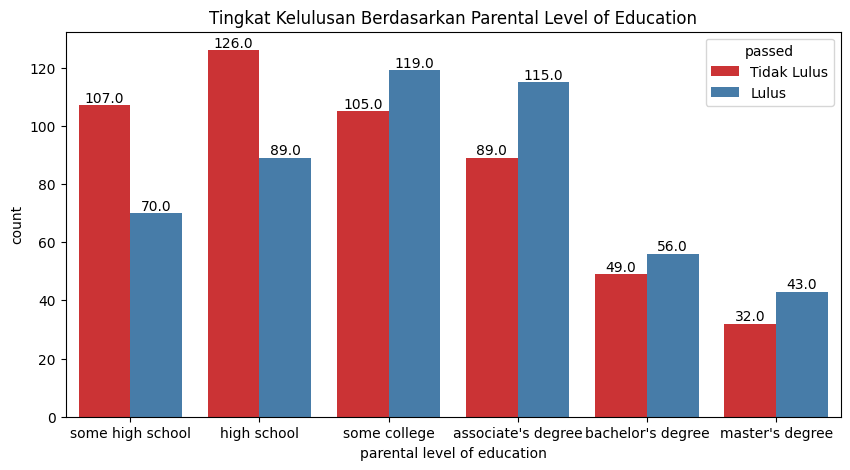

In [ ]:
# Mengubah kolom kategori menjadi tipe data kategori dan menentukan urutan kategori
category_order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]
df['parental level of education'] = pd.Categorical(df['parental level of education'], categories=category_order, ordered=True)

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='parental level of education', hue='passed', palette='Set1')

# Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Tingkat Kelulusan Berdasarkan Parental Level of Education')
plt.show()

Belum terlalu terlihat efek dari parental level of education terhadap performa dan kelulusan siswa. Oleh karena itu, akan dilakukan perhitungan persentase untuk setiap kategori level of education.

In [ ]:
# Mencetak persentase lulus dan tidak lulus untuk setiap kategori
for category in category_order:
    passed = df[(df['parental level of education'] == category) & (df['passed'] == 'Lulus')].shape[0]
    total = df[df['parental level of education'] == category].shape[0]
    percentage_passed = (passed / total) * 100
    percentage_failed = 100 - percentage_passed
    print(f"Kategori: {category}")
    print(f"Persentase yang lulus: {percentage_passed:.1f}%")
    print(f"Persentase yang tidak lulus: {percentage_failed:.1f}%")
    print()


Kategori: some high school
Persentase yang lulus: 39.5%
Persentase yang tidak lulus: 60.5%

Kategori: high school
Persentase yang lulus: 41.4%
Persentase yang tidak lulus: 58.6%

Kategori: some college
Persentase yang lulus: 53.1%
Persentase yang tidak lulus: 46.9%

Kategori: associate's degree
Persentase yang lulus: 56.4%
Persentase yang tidak lulus: 43.6%

Kategori: bachelor's degree
Persentase yang lulus: 53.3%
Persentase yang tidak lulus: 46.7%

Kategori: master's degree
Persentase yang lulus: 57.3%
Persentase yang tidak lulus: 42.7%



**Kesimpulan**: Setelah dihitung dengan persentase, ternyata efek dari parental level of education cukup terlihat. Semakin tinggi level of education orang tua, semakin tinggi persentase kelulusan siswa. Hal ini disebabkan oleh lingkungan rumah siswa tersebut yang bisa dibilang lebih akrab dengan edukasi dibanding mereka yang orang tuanya memiliki level of education lebih rendah.

**4. Apakah ras memengaruhi kelulusan?**

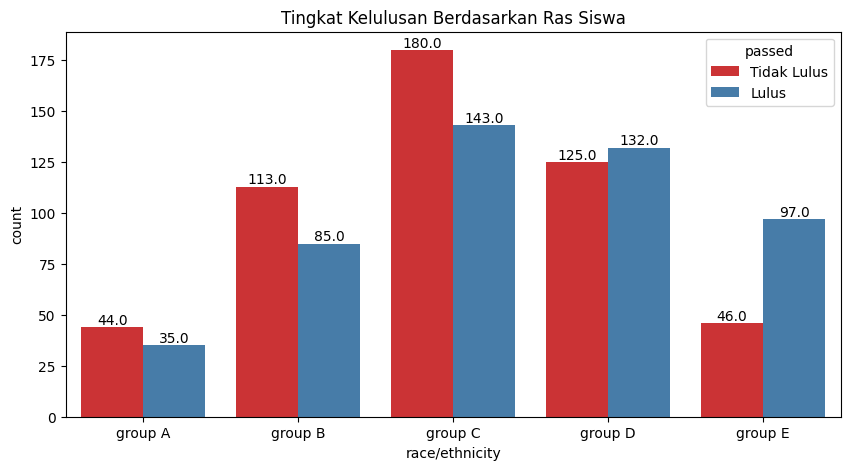

In [ ]:
# Mengurutkan kategori pada sumbu x berdasarkan urutan abjad
df['race/ethnicity'] = df['race/ethnicity'].astype('category')
df['race/ethnicity'] = df['race/ethnicity'].cat.reorder_categories(sorted(df['race/ethnicity'].unique()))

# Membuat count plot dengan urutan yang diperbarui
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='race/ethnicity', hue='passed', palette='Set1')

# Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Tingkat Kelulusan Berdasarkan Ras Siswa')
plt.show()


**Kesimpulan**: Tampak jelas bahwa ras Group E memiliki probabilitas yang lebih besar untuk lulus dibanding ras lainnya. Hal ini dapat berkaitan dengan stigma masyarakat, khususnya masyarakat Amerika yang mengira bahwa ras-ras tertentu memiliki kemampuan yang lebih daripada ras-ras lainnya. Contohnya adalah stigma bahwa ras Asia lebih pintar dalam mata pelajaran Matematika. Dengan adanya data seperti ini, ada kemungkinan bahwa beberapa stigma tersebut benar adanya.

**5. Apa korelasi siswa yang mendapat makan siang gratis/murah dan yang secara standard harus membayar makan siang terhadap kelulusan?**

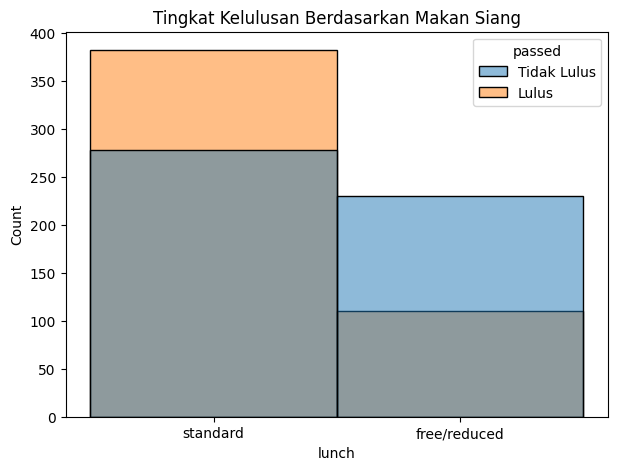

In [ ]:
plt.figure(figsize=(7, 5))
ax = sns.histplot(data=df, x='lunch', hue='passed')

plt.title('Tingkat Kelulusan Berdasarkan Makan Siang')
plt.show()

**Kesimpulan**: Siswa yang mendapat makan siang dengan harga standard terbukti memiliki probabilitas lulus yang lebih tinggi daripada mereka yang mendapatkan makan siang gratis/murah. Hal ini dapat disebabkan oleh kondisi keluarganya yang bisa dibilang lebih mampu secara ekonomi yang berimbas pada lingkungan belajar siswa tersebut di rumah. Dengan fasilitas lengkap yang dapat menunjang pendidikan sehingga mereka lebih memiliki banyak resources daripada mereka yang mendapat makan siang gratis/murah.

**6. Berapa besar *impact* dari test preparation course terhadap kelulusan?**

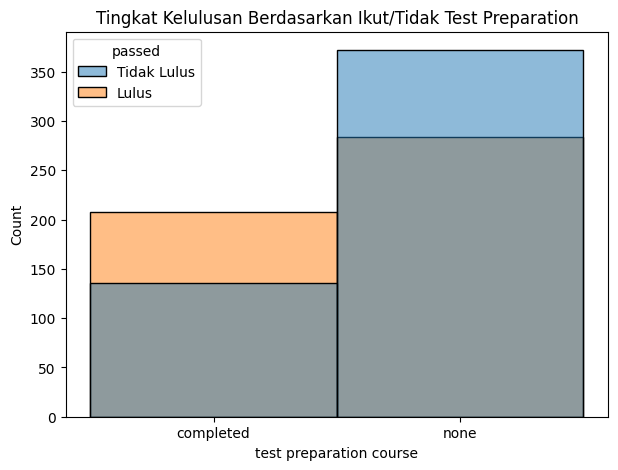

In [ ]:
plt.figure(figsize=(7, 5))
ax = sns.histplot(data=df, x='test preparation course', hue='passed')

plt.title('Tingkat Kelulusan Berdasarkan Ikut/Tidak Test Preparation')
plt.show()

**Kesimpulan**: Tampak bahwa siswa yang menyelesaikan test preparation course lebih banyak yang lulus dibanding mereka yang tidak mengerjakan. Hal ini masuk akal karena pasti dengan siswa berlatih mengerjakan soal-soal, akan lebih terbiasa saat ujian datang. Terdapat sekitar 60% siswa yang menyelesaikan course yang lulus dan sekitar 40% siswa yang tidak menyelesaikan course yang lulus

**7. Berapa perbandingan antara siswa laki-laki yang lulus dengan siswa perempuan yang lulus?**

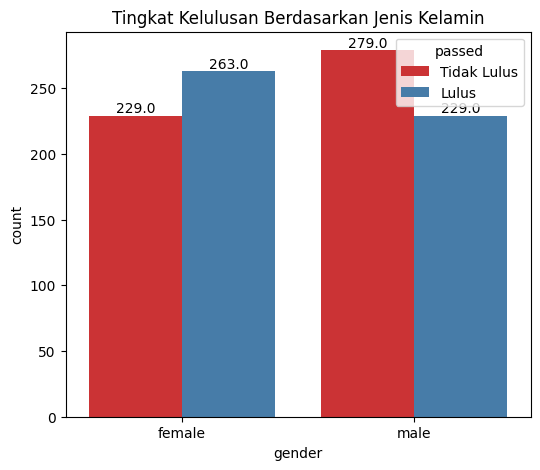

In [ ]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='gender', hue='passed', palette='Set1')

#  Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Tingkat Kelulusan Berdasarkan Jenis Kelamin')
plt.show()

**Kesimpulan**: Tampak pada grafik bahwa jumlah siswa perempuan yang lulus dengan siswa laki-laki yang lulus tidak jauh beda dan memiliki perbandingan sekitar 1.1:1

**8. Bagaimana karakteristik siswa yang lulus? (nilai di atas 70)**

Berdasarkan pertanyaan-pertanyaan di atas, dapat diambil kesimpulan bahwa karakteristik siswa yang lulus adalah
1. Siswa dengan parental level of education tinggi
2. Siswa ras Group E
2. Siswa yang mendapat makan siang dengan harga standard
3. Siswa yang menyelesaikan test preparation course
4. Siswa berjenis kelamin perempuan